# Data scraping functions

In [3]:
#!pip install TwitterSearch
from TwitterSearch import *
import time
import datetime
import json
import pandas as pd
from pandas import *
import os
import os.path
import re
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point

# Ensure that we can see full tweets
pd.set_option('max_colwidth', 350)

In [5]:
def scrapeTweets (jsonFile, ORkeyword_list, AND_word_list = None,geocode = None, startDate = None, endDate = None):
    try:
        
        ts = TwitterSearch(
#             consumer_key = 'xlVkwqucAZTeW5SRxNXZMYuXO',
#             consumer_secret = 'QNsmLzwgP7b57llvg8BDWYaU1xynDP9grCgs49FYYEvwxeJDZ8',
#             access_token = '588012741-kjxlrAPPbe6vqeb5vCpin3jQyGMgNo94zX2pE1Ji',
#             access_token_secret = 'WjyWCQ6X10ndzZRj7wbYubRnMycDQTvNVjZcB2JwJwSzI'
            consumer_key = 'bQsdYC4VOaQEYzJc0GlS5Kjox',
            consumer_secret = 'sa3S0K38teo6XYZYitM7nW5fcvh8A64O36zYBD4gJ7Woxqr6ku',
            access_token = '1190054573764820993-9BSNn5ix5WkdoSdHitZcdSxCqZJLIi',
            access_token_secret = 'noOLWmmarQTCBcJnt668pNmRhcfJfQmtIRtSj7V2NbzrG'
         )

        
        tso = TwitterSearchOrder()
        tso.set_count(100)
        tso.set_language('en')                               # Set the language 
        
        if(ORkeyword_list):
            tso.set_keywords(ORkeyword_list, or_operator = True)
        
        if(AND_word_list):
            tso.add_keyword(AND_word_list)
        
        if(geocode):
            lat = geocode[0]
            long = geocode[1]
            radius = geocode[2]
            tso.set_geocode(lat, long, radius, imperial_metric=True)
    
        if(startDate):
            tso.set_since(datetime.date(startDate))
        
        if(endDate):
            tso.set_until(datetime.date(endDate))

        if os.path.isfile(jsonFile) == False:
            firstwrite = open(jsonFile, 'w')
            firstwrite.write("[")
            firstwrite.close()
        
        f = open(jsonFile, 'a') #opening the file     
        for tweet in ts.search_tweets_iterable(tso): #, callback=my_callback_closure):
#             print(tweet)
            json.dump(tweet, f)
            f.write(",")
        f.seek(0, os.SEEK_END)
        f.seek(f.tell() - 1, os.SEEK_SET)
        f.truncate()
        
        f.close()

    except TwitterSearchException as e:
        print(e)

In [6]:
def cleaning(text):

    import string
    exclude = set(string.punctuation)

    import re
    # remove new line and digits with regular expression
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\d', '', text)
    # remove patterns matching url format
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    text = re.sub(url_pattern, ' ', text)
    # standardize white space
    text = re.sub(r'\s+', ' ', text)
    #remove white space
    text = text.strip()

    return text

In [7]:
#Tweet information : Returns a Dataframe 

def parse_tweets(all_tweets):
    #General information regarding each tweet.
    tweetid =  [tweet['id'] for tweet in all_tweets]
    time = [pd.to_datetime(tweet['created_at']) for tweet in all_tweets]
    text = [tweet['text'] if 'text' in tweet else tweet['full_text'] for tweet in all_tweets]
    Hashtags = [tweet['entities']['hashtags'] for tweet in all_tweets]
    source= [tweet['source'] for tweet in all_tweets]

    #User profile information
    User_allinfo = [tweet['user'] for tweet in all_tweets]

    Username = [tweet['user']['name'] for tweet in all_tweets]
    Screen_name = [tweet['user']['screen_name'] for tweet in all_tweets]

    User_location = [tweet['user']['location'] for tweet in all_tweets]
    followers_count = [tweet['user']['followers_count'] for tweet in all_tweets]
    friends_count = [tweet['user']['friends_count'] for tweet in all_tweets]
    Geo_enabled = [tweet['user']['geo_enabled'] for tweet in all_tweets]
    
#     possibly_sensitive = [tweet['possibly_sensitive'] for tweet in all_tweets]
#     reply_count = [tweet['reply_count'] for tweet in all_tweets]
#     quote_count = [tweet['quote_count'] for tweet in all_tweets]
    retweet_count = [tweet['retweet_count'] for tweet in all_tweets]

    favorite_count = [tweet['favorite_count'] for tweet in all_tweets]

    #Tweet location : place 
    Geo = [tweet['geo'] for tweet in all_tweets]
    Coordinates = [tweet['coordinates'] for tweet in all_tweets]
    Place = [tweet['place'] for tweet in all_tweets]

    TravelTweets = pd.DataFrame({'Time':time,'source':source,'Username':Username,'Screen_name':Screen_name,'User_location':User_location,'Text':text,'Hashtags':Hashtags,'Geo_enabled':Geo_enabled,'Geo':Geo,'Coordinates':Coordinates,'Place':Place,'retweet_count':retweet_count,'followers_count':followers_count,'friends_count':friends_count,'tweet_favourite_count':favorite_count,'User_allinfo':User_allinfo}, index=tweetid) #.sort_index(ascending=True)
    
    cleaner = lambda x: cleaning(x)
    TravelTweets['Text'] = TravelTweets['Text'].apply(cleaner)
    # Replace and remove empty rows
    TravelTweets['Text'] = TravelTweets['Text'].replace('', np.nan)
#     TravelTweets = TravelTweets.dropna(how='any')
    
    #return TravelTweets[:1000]
    return TravelTweets

In [8]:
#Reading all the tweets from the json file.

def extractFromJson(filename) :
    with open(filename,"r") as read_file:
        all_tweets = json.load(read_file)
        return all_tweets

### Add a ']' in the end.


In [46]:
def addlastbraq():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it
            f.write("]")
            f.close()
    
# addlastbraq()  #remove the comment to run it 

# os.getcwd()

IsADirectoryError: [Errno 21] Is a directory: '.ipynb_checkpoints'

### Add a ']' in the end.

In [ ]:
def addlastcomma():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it
            f.write(",")
            f.close()
    
# addlastcomma()  

### Remove the final ']'  from the end of the json
#### Only use when need be.


In [ ]:
def removelastbraq():
#     path = ".//Desktop//Courses//202//Project//new_tweets"
#     file = os.listdir(path)
    
    for file in os.listdir(os.getcwd()): 
        if file.endswith(".json"):  #Check if the file name matches the 'prefix' pattern.
#             f = open(file,'a')    #remove the comment to run it 
            f.seek(0, os.SEEK_END)
            f.seek(f.tell() - 1, os.SEEK_SET)
            f.truncate()
        
            f.close()
    
    
# removelastbraq() #remove the comment to run it 

# os.getcwd()

# Scraping data

In [0]:
# Inorder to load content from the local drive, we have to specify the path : 

# from google.colab import drive
# drive.mount('/your path')  # Nicole upload an

In [74]:
# for i in range(0, 20):
#     scrapeTweets("pyramids.json", ['pyramid', 'pyramids', 'giza', 'sphinx', 'museum', 'wonder'], [], [29.9792, 31.1342, 3])
#     scrapeTweets("colosseum.json", ['collosseum', 'coliseum', 'roman', 'palatine', 'battle', 'rome'], [], [41.8902, 12.4922, 2])    
#     scrapeTweets("eiffel.json", ['eiffel', 'tower', 'effiel', 'tour'], [], [48.8584, 2.2945, 2])

In [0]:
# for i in range(0, 20):
#     scrapeTweets("borabora.json", ['tahiti', 'island', 'bungalow', 'polynesia', 'beach'], [], [-16.499701, -151.770538, 5])
#     scrapeTweets("machu.json", ['machu', 'picchu', 'macchu', 'pichu', 'lost', 'city', 'inca', 'incas', 'empire', 'andes', 'ruins', 'civilization'], [], [-13.163068, -72.545128, 3])
#     scrapeTweets("statueliberty.json", ['statue', 'liberty', 'lady', 'free', 'freedom', 'torch', 'ellis', 'immigration', 'immigrants'], [], [40.6892, -74.0445, 2])


In [0]:
# for i in range(0, 20):
#     scrapeTweets("angkor.json", ['angkor', 'ankor', 'wat', 'temple', 'statue', 'khmer', 'hindu', 'religious', 'vishnu', 'tower', 'ancient'], [], [13.4125, 103.867, 3])
#     scrapeTweets("hiroshima.json", ['hiroshima', 'peace', 'memorial', 'museum', 'bombing', 'healing', 'bomb', 'atomic', 'war', 'nuclear'], [], [34.3955, 132.4512, 2])
#     scrapeTweets("mlk.json", ['mlk', 'martin', 'luther', 'king', 'memorial', 'activism', 'civil rights', 'african american', 'i have a dream', 'equal', 'racial'], [], [38.8862, -77.044234, 2])
#     scrapeTweets("victoriafalls.json", ['victoria', 'falls', 'waterfall', 'wonder', 'tallest', 'vic falls', 'geological', 'natural wonder'], [], [-17.924444, 25.8572, 2])

In [0]:
#adding extra tweets
# scrapeTweets("tablemt.json", ['table', 'mountain', 'national', 'park', 'nature', 'hike', 'views', 'table mt', 'landmark', 'cape fold'], [], [-33.918861, 18.4233, 3])


In [11]:
#Just by Geocode.

# for i in range(0,3):
#   #Destination: Sagrada Família church
# scrapeTweets("Barca_geocode.json", ['*'],[],[41.40,2.17,2])

#   #Destination: 9/11 Memorial
scrapeTweets("911_memorial_geocode.json", ['*'],[],[40.7115,-74.012725,2])

#   #Destination: Burj Khalifa 
scrapeTweets("Burj_khalifa_geocode.json", ['*'],[],[25.1972,55.2744,2])

#     #Destination: Auschwitz-Birkenau State Museum, Poland
scrapeTweets("Poland_geocode.json", ['*'],[],[50.0348,19.1737,2])

#     #Destination : Sydney Opera House
scrapeTweets("Sydney_Opera_geocode.json", ['*'],[],[-33.856159,151.215256,2])

#     #Destination : Taj Mahal
scrapeTweets("Taj_mahal_geocode.json", ['*'],[],[27.1751,78.0421,2])

#     #Destination : Old Havana
scrapeTweets("Havana_geocode.json", ['*'],[],[23.1344,-82.3533,2])

#     #Destination : Golden Gate Bridge
scrapeTweets("Golden_Gate_geocode.json", ['*'],[],[37.8199,-122.4783,2])

#     #Destination : Saint Basil's Cathedral, Russia
scrapeTweets("Saint_Basil_geocode.json", ['*'],[],[55.7525,37.6231,2])

#     #Destination : Yellowstone National Park
scrapeTweets("YellowStone_geocode.json", ['*'],[],[44.428,-110.5885,2])


In [45]:
#By kerwords only

# for i in range(0,3):
#   #Destination: Sagrada Família church
# scrapeTweets("Barca_keyword.json", ['Sagrada Família church'],['barcelona'],[])

#   #Destination: 9/11 Memorial
# scrapeTweets("911_memorial_keyword.json", ['9/11 Memorial Museum'],[],[])

# #   #Destination: Burj Khalifa 
# scrapeTweets("Burj_khalifa_keyword.json", ['burj khalifa'],[],[])

# #     #Destination: Auschwitz-Birkenau State Museum, Poland 'auschwitz', 'birkenau', 'nazi','concentration', 'camp','auswitz','auswich', 'jewish',
# scrapeTweets("Poland_keyword.json", ['Auschwitz-Birkenau State Museum'],[],[])

# #     #Destination : Sydney Opera House , 'opera', 'mystical'
# scrapeTweets("Sydney_Opera_keyword.json", ['Sydney opera'],[],[])

# #     #Destination : Taj Mahal , 'mahal', 'marble','maosoleum', 'jahan','agra', 'emperor'
# scrapeTweets("Taj_mahal_keyword.json", ['taj mahal'],['agra'],[])

# #     #Destination : Old Havana
# scrapeTweets("Havana_keyword.json", ['old havana', 'habana','havana'],[],[])

# #     #Destination : Golden Gate Bridge 'SF', 'San Fran', 'Bridge','bay area', 'san francisco','bay'
# scrapeTweets("Golden_Gate_keyword.json", ['Golden Gate Bridge', 'SF bridge'],[],[])

# #     #Destination : Saint Basil's Cathedral, Russia 'moscow', 'cathedral', 'red square','church'
# scrapeTweets("Saint_Basil_keyword.json", ['st basil\'s cathedral', 'saint basil\'s cathedral'],[],[])

# #     #Destination : Yellowstone National Park  ,'habitat', 'nature','old', 'faithful', 'landscape','wyoming'
# scrapeTweets("YellowStone_keyword.json", ['yellow stone'],['national', 'park'],[])


In [9]:
#Needs a json file and loads it in a list.
# mlk_tweets = extractFromJson("mlk.json")
# hiroshima_tweets = extractFromJson("hiroshima.json")
# angkor_tweets = extractFromJson("angkor.json")
# victoriafalls_tweets = extractFromJson("victoriafalls.json")
# statueliberty_tweets = extractFromJson("statueliberty.json")
# machu_tweets = extractFromJson("machu.json")
# tablemt_tweets = extractFromJson("tablemt.json")
# eiffel_tweets = extractFromJson("eiffel.json")
# colosseum_tweets = extractFromJson("colosseum.json")
# pyramids_tweets = extractFromJson("pyramids.json")

#Geocoded ones 
Barcelona_Tweet_geocode = extractFromJson("Barca_geocode.json")
NYC_memorial_tweets_geocode = extractFromJson("911_memorial_geocode.json")
Burj_khalifa_tweets_geocode = extractFromJson("Burj_khalifa_geocode.json")
Poland_tweets_geocode = extractFromJson("Poland_geocode.json")
Sydney_Opera_tweets_geocode = extractFromJson("Sydney_Opera_geocode.json")
Taj_mahal_tweets_geocode = extractFromJson("Taj_mahal_geocode.json")
Havana_tweets_geocode = extractFromJson("Havana_geocode.json")
Golden_Gate_tweets_geocode = extractFromJson("Golden_Gate_geocode.json")
Saint_Basil_tweets_geocode = extractFromJson("Saint_Basil_geocode.json")
YellowStone_tweets_geocode = extractFromJson("YellowStone_geocode.json")

#Keyword specific ones
Barcelona_Tweet_keyword = extractFromJson("Barca_keyword.json")
NYC_memorial_tweets_keyword = extractFromJson("911_memorial_keyword.json")
Burj_khalifa_tweets_keyword = extractFromJson("Burj_khalifa_keyword.json")
Poland_tweets_keyword = extractFromJson("Poland_keyword.json")
Sydney_Opera_tweets_keyword = extractFromJson("Sydney_Opera_keyword.json")
Taj_mahal_tweets_keyword = extractFromJson("Taj_mahal_keyword.json")
Havana_tweets_keyword = extractFromJson("Havana_keyword.json")
Golden_Gate_tweets_keyword = extractFromJson("Golden_Gate_keyword.json")
Saint_Basil_tweets_keyword = extractFromJson("Saint_Basil_keyword.json")
YellowStone_tweets_keyword = extractFromJson("YellowStone_keyword.json")

In [123]:
#return deduplicated dataframe
# Barcelona_Tweet_geocode

In [10]:
# takes the content and returns a dateframe of relevant columns.
# MLKTweets = parse_tweets(mlk_tweets)
# HiroshimaTweets = parse_tweets(hiroshima_tweets)
# AngkorTweets = parse_tweets(angkor_tweets)
# VictoriaTweets = parse_tweets(victoriafalls_tweets)
# StatueLibertyTweets = parse_tweets(statueliberty_tweets)
# MachuTweets = parse_tweets(machu_tweets)
# TableMtTweets = parse_tweets(tablemt_tweets)
# EiffelTweets = parse_tweets(eiffel_tweets)
# ColosseumTweets = parse_tweets(colosseum_tweets)
# PyramidsTweets = parse_tweets(pyramids_tweets)

Barcelona_Tweet_geocode = parse_tweets(Barcelona_Tweet_geocode)
Barcelona_Tweet_geocode['Loc_key'] = 'Location'
NYC_memorial_tweets_geocode = parse_tweets(NYC_memorial_tweets_geocode)
NYC_memorial_tweets_geocode['Loc_key'] = 'Location'
Burj_khalifa_tweets_geocode = parse_tweets(Burj_khalifa_tweets_geocode)
Burj_khalifa_tweets_geocode['Loc_key'] = 'Location'
Poland_tweets_geocode = parse_tweets(Poland_tweets_geocode)
Poland_tweets_geocode['Loc_key'] = 'Location'
Sydney_Opera_tweets_geocode = parse_tweets(Sydney_Opera_tweets_geocode)
Sydney_Opera_tweets_geocode['Loc_key'] = 'Location'
Taj_mahal_tweets_geocode = parse_tweets(Taj_mahal_tweets_geocode)
Taj_mahal_tweets_geocode['Loc_key'] = 'Location'
Havana_tweets_geocode = parse_tweets(Havana_tweets_geocode)
Havana_tweets_geocode['Loc_key'] = 'Location'
Golden_Gate_tweets_geocode = parse_tweets(Golden_Gate_tweets_geocode)
Golden_Gate_tweets_geocode['Loc_key'] = 'Location'
Saint_Basil_tweets_geocode = parse_tweets(Saint_Basil_tweets_geocode)
Saint_Basil_tweets_geocode['Loc_key'] = 'Location'
YellowStone_tweets_geocode = parse_tweets(YellowStone_tweets_geocode)
YellowStone_tweets_geocode['Loc_key'] = 'Location'

Barcelona_Tweet_keyword = parse_tweets(Barcelona_Tweet_keyword)
Barcelona_Tweet_keyword['Loc_key'] = 'Keyword'
NYC_memorial_tweets_keyword = parse_tweets(NYC_memorial_tweets_keyword)
NYC_memorial_tweets_keyword['Loc_key'] = 'Keyword'
Burj_khalifa_tweets_keyword = parse_tweets(Burj_khalifa_tweets_keyword)
Burj_khalifa_tweets_keyword['Loc_key'] = 'Keyword'
Poland_tweets_keyword = parse_tweets(Poland_tweets_keyword)
Poland_tweets_keyword['Loc_key'] = 'Keyword'
Sydney_Opera_tweets_keyword = parse_tweets(Sydney_Opera_tweets_keyword)
Sydney_Opera_tweets_keyword['Loc_key'] = 'Keyword'
Taj_mahal_tweets_keyword = parse_tweets(Taj_mahal_tweets_keyword)
Taj_mahal_tweets_keyword['Loc_key'] = 'Keyword'
Havana_tweets_keyword = parse_tweets(Havana_tweets_keyword)
Havana_tweets_keyword['Loc_key'] = 'Keyword'
Golden_Gate_tweets_keyword = parse_tweets(Golden_Gate_tweets_keyword)
Golden_Gate_tweets_keyword['Loc_key'] = 'Keyword'
Saint_Basil_tweets_keyword = parse_tweets(Saint_Basil_tweets_keyword)
Saint_Basil_tweets_keyword['Loc_key'] = 'Keyword'
YellowStone_tweets_keyword = parse_tweets(YellowStone_tweets_keyword)
YellowStone_tweets_geocode['Loc_key'] = 'Keyword'


In [119]:
# Sydney_Opera_tweets_geocode
# Barcelona_Tweets =  pd.concat([Barcelona_Tweet_geocode, Barcelona_Tweet_keyword])
# Barcelona_Tweets

In [11]:
#Combining the data frames of keywords and geocode.

Barcelona_Tweets =  pd.concat([Barcelona_Tweet_geocode, Barcelona_Tweet_keyword])
NYC_memorial_tweets = pd.concat([NYC_memorial_tweets_geocode, NYC_memorial_tweets_keyword ])
Burj_khalifa_tweets = pd.concat([Burj_khalifa_tweets_geocode,Burj_khalifa_tweets_keyword ])
Poland_tweets = pd.concat([Poland_tweets_geocode, Poland_tweets_keyword ])
Sydney_Opera_tweets = pd.concat([Sydney_Opera_tweets_geocode, Sydney_Opera_tweets_keyword ])
Taj_mahal_tweets =pd.concat([Taj_mahal_tweets_geocode, Taj_mahal_tweets_keyword ])
Havana_tweets = pd.concat([Havana_tweets_geocode, Havana_tweets_keyword ])
Golden_Gate_tweets = pd.concat([Golden_Gate_tweets_geocode, Golden_Gate_tweets_keyword ])
Saint_Basil_tweets = pd.concat([Saint_Basil_tweets_geocode, Saint_Basil_tweets_keyword ])
YellowStone_tweets = pd.concat([YellowStone_tweets_geocode, YellowStone_tweets_keyword],sort = False)

Time  \
1204832165684334592 2019-12-11 18:35:47+00:00   
1204821786694545408 2019-12-11 17:54:33+00:00   
1204811411450236928 2019-12-11 17:13:19+00:00   
1204801024759742464 2019-12-11 16:32:03+00:00   
1204790649565765633 2019-12-11 15:50:49+00:00   
1204779547217973248 2019-12-11 15:06:42+00:00   
1204777657222615041 2019-12-11 14:59:11+00:00   
1204467642880258048 2019-12-10 18:27:18+00:00   
1204457262611222528 2019-12-10 17:46:03+00:00   
1204440502889672704 2019-12-10 16:39:27+00:00   
1204436509589299206 2019-12-10 16:23:35+00:00   
1204113473266806795 2019-12-09 18:59:58+00:00   
1204081426892648448 2019-12-09 16:52:37+00:00   
1204070757778649089 2019-12-09 16:10:13+00:00   
1203797312645947394 2019-12-08 22:03:39+00:00   
1203385014181744641 2019-12-07 18:45:19+00:00   
1203374306819899392 2019-12-07 18:02:47+00:00   
1203363626137997314 2019-12-07 17:20:20+00:00   
1203342278988713985 2019-12-07 15:55:30+00:00   
1203331575535947776 2019-12-07 15:12:59+00:00   
1203007549961732096 2019-12-06 17:45:25+00:00   
1202996842415263744 2019-12-06 17:02:52+00:00   
1202986166384881664 2019-12-06 16:20:27+00:00   
1202975496037793792 2019-12-06 15:38:03+00:00   
1202722689154052098 2019-12-05 22:53:29+00:00   
1202630781044023297 2019-12-05 16:48:16+00:00   
1202620103822413824 2019-12-05 16:05:51+00:00   
1202609401787371522 2019-12-05 15:23:19+00:00   
1202305874120720384 2019-12-04 19:17:12+00:00   
1202296717514805248 2019-12-04 18:40:49+00:00   
1204551208318488576 2019-12-10 23:59:22+00:00   
1204386905896284160 2019-12-10 13:06:29+00:00   
1203380672561205248 2019-12-07 18:28:04+00:00   
1203380160298442761 2019-12-07 18:26:02+00:00   
1202230711211544576 2019-12-04 14:18:32+00:00   
1201928580587896832 2019-12-03 18:17:59+00:00   

                                                                                                 source  \
1204832165684334592                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204821786694545408                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204811411450236928                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204801024759742464                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204790649565765633                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204779547217973248                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204777657222615041                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204467642880258048                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204457262611222528                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204440502889672704                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204436509589299206                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204113473266806795                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204081426892648448                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1204070757778649089                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1203797312645947394                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1203385014181744641                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1203374306819899392                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1203363626137997314                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1203342278988713985                <a href="https://www.careerarc.com" rel="nofollow">CareerArc 2.0</a>   
1203331575535947776                <a href="https://www.careerarc.com" rel="nofollow">C

In [123]:
## Duplicate 
# Golden_Gate_tweets_keyword = parse_tweets(Golden_Gate_tweets_keyword)

# print(Golden_Gate_tweets_keyword)

# print(len(Golden_Gate_tweets_keyword))
# Golden_Gate_tweets_keyword.drop_duplicates(subset="Text", keep="first", inplace=True)
# print(len(Golden_Gate_tweets_keyword))



### deduplication

In [125]:
# citylist = [EiffelTweets, PyramidsTweets, ColosseumTweets, MachuTweets, StatueLibertyTweets, 
#             AngkorTweets, HiroshimaTweets, MLKTweets,VictoriaTweets, TableMtTweets, 
#             NYC_memorial_tweets, Barcelona_Tweet, Burj_khalifa_tweets, Poland_tweets,
#            Sydney_Opera_tweets, Taj_mahal_tweets, Havana_tweets, Golden_Gate_tweets,
#            Saint_Basil_tweets, YellowStone_tweets]

mycitylist = [Barcelona_Tweets, NYC_memorial_tweets, Burj_khalifa_tweets, Poland_tweets,Sydney_Opera_tweets
              , Taj_mahal_tweets, Havana_tweets, Golden_Gate_tweets, Saint_Basil_tweets, YellowStone_tweets]

#deduplication
for destination in mycitylist:
    destination.drop_duplicates(subset="Text", keep="first", inplace=True)



In [127]:
for destination in mycitylist:
    print( len(destination))

182
217
810
14
312
277
688
955
144
36


In [0]:
import csv

masterlist = []
with open("Keywords_Cities - Sheet2.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        row[0] = row[0].strip()
        masterlist.append(row)

print(masterlist)

[['Paris, France', 'Eiffel Tower', 'Landmark', '48.8584', '2.2945'], ['Cairo, Egypt', 'Great Pyramid of Giza', 'Landmark', '29.9792', '31.1342'], ['Rome, Italy', 'Colosseum', 'Landmark', '41.8902', '12.4922'], ['Peru', 'Machu Picchu', 'Landmark', '-13.163068', '-72.545128'], ['New York, USA', 'Statue of Liberty', 'Landmark', '40.6892', '-74.0445'], ['Angkor, Cambodia', 'Angkor Wat', 'Religious', '13.4125', '103.867'], ['Hiroshima, Japan', 'Hiroshima Peace Memorial', 'Memorial', '34.3955', '132.4512'], ['Washington DC, USA', 'Martin Luther King Jr. Memorial', 'Memorial', '38.8862', '-77.044234'], ['Zambezi River, Zimbabwe and Zambia', 'Victoria Falls', 'Nature', '-17.924444', '25.8572'], ['Cape Town, South Africa', 'Table Mountain National Park', 'Nature', '-33.918861', '18.4233'], ['NYC, USA', '9/11 Memorial Museum', 'Memorial', '40.7115', '-74.012725'], ['Barcelona, Spain', 'Sagrada Família church', 'Religious', '41.403664', '2.174391'], ['Dubai, United Arab Emirates', 'Burj Khalifa',

In [0]:
#count of cleaned datasets
for i in range(len(mycitylist)):
    print(masterlist[i][1], len(citylist[i]))

Eiffel Tower 65
Great Pyramid of Giza 30
Colosseum 76
Machu Picchu 22
Statue of Liberty 67
Angkor Wat 27
Hiroshima Peace Memorial 34
Martin Luther King Jr. Memorial 54
Victoria Falls 17
Table Mountain National Park 39
9/11 Memorial Museum 108
Sagrada Família church 119
Burj Khalifa 54
Auschwitz-Birkenau State Museum, Poland 125
Sydney Opera House 55
Taj Mahal 80
Old Havana 65
Golden Gate Bridge 168
Saint Basil's Cathedral 212
Yellowstone National Park 32


# Emoji functions

In [0]:
import emoji
import regex

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [0]:
def emoji_dict(dataframe):
    import emoji
    listemojis = []
    
    for tweet in dataframe['Text']:
        if any(char in emoji.UNICODE_EMOJI for char in tweet):
            listemojis.append(extract_emojis(tweet))
        
    #create set of unique emojis
    uniqueemojis = set()
    
    for emojis in listemojis:
        for emoji in emojis:
            uniqueemojis.add(emoji)
            
    #create dictionary of emojis, all counts set to zero
    emojicount = {}
    for i in uniqueemojis:
        emojicount[i] = 0
        
    
    #loop through list and count emojis
    for emojis in listemojis:
        for emoji in emojis:
            emojicount[emoji] +=1
            
    return emojicount

def sorted_emojicount(emojicount):
    #takes an emoji dictionary created by emoji_dict() and returns a sorted list of tuples
    #where each tuple is (emoji, count)
    
    sorted_emojicount = sorted(emojicount.items(), key=lambda kv: kv[1], reverse=True)
    
    return(sorted_emojicount)

In [0]:
eiffelemojis = emoji_dict(EiffelTweets)
print(eiffelemojis)
print(sorted_emojicount(eiffelemojis))



In [0]:
# for i in eiffelemojis:
#     print(i[0])
#     print(emoji.demojize(i[0]))
    
for i in eiffelemojis:
    if emoji.demojize(i[0]) == ":hugging_face:":
        print(i)

#### Sentiment analysis : 

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentences):
    compound = []
    score =  [analyser.polarity_scores(tweet) for tweet in sentences]
    for sc in score:
        compound.append(sc['compound'])
    
    return compound
#     score_compound = score['compound']
#     print("{:-<300} {}".format(tweet, str(score)))
    


In [13]:
#Getting the final (mean) sentiment score associated with each tweet. 

def Fetch_sentiment_score(df): #Takes dataframe as the input.
    compound_score = sentiment_analyzer_scores(df['Text'])  #Pass the text column of the dataframe you want to analyze.

    df['Compound_score'] = compound_score 

    #Splitting the score into ordinal categories [1,2,3,4,5] : 1,2 <- negetive | 3 <- Neutral | 5 <- Positive
    df['Score'] = pd.cut(df['Compound_score'], bins=5, labels=[1, 2, 3, 4, 5])

    #Converting the tweets sentiment into numerical values. and taking the mean for the complete set.
    df['Score'] = df['Score'].astype('int')


In [14]:
def Final_senti_score(df):
    return df['Score'].mean()

# Creating masterlist

In [0]:
import csv

masterlist = []
with open("Keywords_Cities - Sheet2.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        row[0] = row[0].strip()
        masterlist.append(row)

print(masterlist)

"""
masterlist[0]: Location
masterlist[1]: Destination name
masterlist[2]: Destination type
masterlist[3]: Latitude
masterlist[4]: Longitude
masterlist[5]: Emoji dictionary
masterlist[6]: Sentiment mean
"""

[['Paris, France', 'Eiffel Tower', 'Landmark', '48.8584', '2.2945'], ['Cairo, Egypt', 'Great Pyramid of Giza', 'Landmark', '29.9792', '31.1342'], ['Rome, Italy', 'Colosseum', 'Landmark', '41.8902', '12.4922'], ['Peru', 'Machu Picchu', 'Landmark', '-13.163068', '-72.545128'], ['New York, USA', 'Statue of Liberty', 'Landmark', '40.6892', '-74.0445'], ['Angkor, Cambodia', 'Angkor Wat', 'Religious', '13.4125', '103.867'], ['Hiroshima, Japan', 'Hiroshima Peace Memorial', 'Memorial', '34.3955', '132.4512'], ['Washington DC, USA', 'Martin Luther King Jr. Memorial', 'Memorial', '38.8862', '-77.044234'], ['Zambezi River, Zimbabwe and Zambia', 'Victoria Falls', 'Nature', '-17.924444', '25.8572'], ['Cape Town, South Africa', 'Table Mountain National Park', 'Nature', '-33.918861', '18.4233'], ['NYC, USA', '9/11 Memorial Museum', 'Memorial', '40.7115', '-74.012725'], ['Barcelona, Spain', 'Sagrada Família church', 'Religious', '41.403664', '2.174391'], ['Dubai, United Arab Emirates', 'Burj Khalifa',

'\nmasterlist[0]: Location\nmasterlist[1]: Destination name\nmasterlist[2]: Destination type\nmasterlist[3]: Latitude\nmasterlist[4]: Longitude\nmasterlist[5]: Emoji dictionary\nmasterlist[6]: Sentiment mean\n'

In [0]:
citylist = [EiffelTweets, PyramidsTweets, ColosseumTweets, MachuTweets, StatueLibertyTweets, 
            AngkorTweets, HiroshimaTweets, MLKTweets,VictoriaTweets, TableMtTweets, 
            NYC_memorial_tweets, Barcelona_Tweet, Burj_khalifa_tweets, Poland_tweets,
           Sydney_Opera_tweets, Taj_mahal_tweets, Havana_tweets, Golden_Gate_tweets,
           Saint_Basil_tweets, YellowStone_tweets]

print(len(citylist))



In [0]:
E.to_csv("poland.csv", sep=',', header=None, index=None)


In [0]:
#append emoji dictionaries
for i in range(0,20):
    emojilist = emoji_dict(citylist[i])    
    masterlist[i].append(emojilist)

In [0]:
#append sentiment
for i in range(0,20):
    sentiment_score = Final_sentiment_score(citylist[i])   
    masterlist[i].append(sentiment_score)

    

In [0]:
for i in masterlist:
    print(i[1])
    print(i[6])

In [0]:
def emoji_search(masterlist):
    import emoji
    flag = True
    
    while flag:
        raw_emoji = input("Enter the emoji in text form (ex. grinning_face):")
        
        if raw_emoji == "quit":
            flag = False
        
        raw_emoji = ":"+raw_emoji+":"
        new_emoji = emoji.emojize(raw_emoji, use_aliases=True)

        emojicount = []

        for i in range(0, 20):
            emoji_dict = masterlist[i][5] #find the emoji dictionary

            if new_emoji in emoji_dict:
                emojicount.append(emoji_dict[new_emoji])

            else:
                emojicount.append(0)

        top1 = 0
        top2 = 0
        top3 = 0

        for i in range(0,20):
            if emojicount[i]>top1:
                top1 = emojicount[i]
                name1 = masterlist[i][1]

        for i in range(0,20):
            if emojicount[i]>top2 and emojicount[i]<top1:
                top2 = emojicount[i]
                name2 = masterlist[i][1]

        for i in range(0,20):
            if emojicount[i]>=top3 and emojicount[i]<top2:
                top3 = emojicount[i]
                name3 = masterlist[i][1]

        print("The top destination that uses this emoji is the " + name1 + 
              ", where it was used " + str(top1) + " times.")

        print("The second most popular destination with this emoji is the " + name2 + 
              ", where it was used " + str(top2) + " times.")

        print("The third most popular destination with this emoji is the " + name3 + 
              ", where it was used " + str(top3) + " times.")
#     for emoji_dictionary in listdicts:
#         if new_emoji in emoji_dictionary:
#             print(emoji_dictionary[new_emoji])
#write in error message for zero

# Scratch paper
testing things, notes, etc

In [0]:
import pandas as pd
df = pd.DataFrame(masterlist)
df.head()

# headers = ["Location", "Destination", "Type of Destination", "Latitude", "Longitude", "Emoji Dictionary", "Sentiment Score"] 

##make csv file
# df.to_csv("sophie.csv", sep=',', header=headers, index=None)

# masterlist[0]: Location
# masterlist[1]: Destination name
# masterlist[2]: Destination type
# masterlist[3]: Latitude
# masterlist[4]: Longitude
# masterlist[5]: Emoji dictionary
# masterlist[6]: Sentiment mean


In [0]:
emoji_search(masterlist)

In [0]:
YellowStone_tweets = extractFromJson("YellowStone2.json")
YellowStone_tweets = parse_tweets(YellowStone_tweets)


In [0]:
testjson = extractFromJson("YellowStone2.json") #this contains the json
testdf = parse_tweets(testjson) #turns it into a dataframe

len(testdf)

800

In [0]:
import json

testjson = extractFromJson("YellowStone2.json") #this contains the json
testdf = parse_tweets(testjson) #turns it into a dataframe

testdf.drop_duplicates(subset="Text", keep="first", inplace=True)
len(testdf)

# testdf.head()


# unique_stuff = { each['text'] : each for each in ds }.values()
# uniquedata = pd.DataFrame(unique_stuff)

32

### Top tweets function 
    > Positive and negetive || Based on :
                 >> Followers 
                 >> Favourited count 

In [15]:
def toptweet_favourite(df):  
    df["Top_fav_follower"]=df.groupby('Score')['followers_count'].rank("dense",ascending=False)
    df["Top_fav_favourite"]=df.groupby('Score')['tweet_favourite_count'].rank("dense",ascending=False)

In [29]:
def senti_histogram(df):
    plt.figure(figsize=(8, 6))
    df['Score'].value_counts().plot(kind="bar")
    plt.ylabel("Number of Tweets")
    plt.title("Number of Tweets based on sentiment");
    plt.legend()

In [121]:
def senti_hist_LocandKey(df):
#     plt.figure(figsize=(8, 6))
#     plt.subplot(111)
#     newdataframe = df[df['Loc_key'] == "Location"]
#     newdataframe['Score'].value_counts().plot(kind="bar")
#     plt.ylabel("Number of Tweets")
#     plt.title("Number of Tweets based on sentiment");
#     plt.legend()
    
    Loc = df[df['Loc_key'] == "Location"]
    key = df[df['Loc_key'] == "Keyword"]
    
#     Loc.plot.hist(x=key['Score'])
#     Loc["Score"].plot.hist()
    
    plt.hist([key['Score'].value_counts(), Loc['Score'].value_counts()], label=['By Keyword', 'By Location'])
    plt.ylabel("Sentiment < 1 [Neg.] --- 5 [Positive]>")
    plt.xlabel("Frequency of Tweets ");
    plt.legend(loc='upper right')
    plt.show()
  

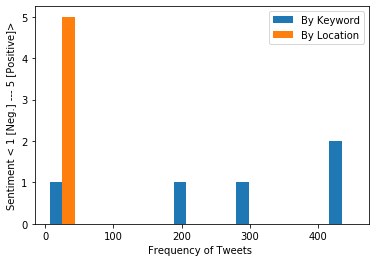

In [122]:
# for dest in mycitylist:
senti_hist_LocandKey(Havana_tweets)

In [103]:
def classification_based_score(df):
    pos_word_score = pd.DataFrame({'pos_score':df.loc[df['Score'] > 3, 'Score']})
    # print(pos_word_score)

    pos_word_score['pos_score'] = pos_word_score['pos_score'].astype('int')

    print("Positive sentiment : ",pos_word_score['pos_score'].mean())
    print("Positive tweets : ",pos_word_score['pos_score'].count())


    neg_word_score = pd.DataFrame({'neg_score':df.loc[df['Score'] < 3, 'Score']})
    # print(pos_word_score)

    neg_word_score['neg_score'] = neg_word_score['neg_score'].astype('int')

    print("Negative sentiment : ",neg_word_score['neg_score'].mean())
    print("Negative tweets : ",neg_word_score['neg_score'].count())


    neu_word_score = pd.DataFrame({'neu_score':df.loc[df['Score'] == 3, 'Score']})
    # print(pos_word_score)

    neu_word_score['neu_score'] = neu_word_score['neu_score'].astype('int')

    print("Neutral sentiment : ",neu_word_score['neu_score'].mean())
    print("Neutral tweets : ",neu_word_score['neu_score'].count())
    
    
classification_based_score(Havana_tweets)

Positive sentiment :  4.390789473684211
Positive tweets :  760
Negative sentiment :  1.8785046728971964
Negative tweets :  214
Neutral sentiment :  3.0
Neutral tweets :  503


In [17]:
"""
Two search options:

-by Geocode: what are people feeling when they are actually at the location?
-by Keywords: what are people feeling when they mention the destination?

How does sentiment differ between the two? emojis used?
"""

mycitylist = [Barcelona_Tweets, NYC_memorial_tweets, Burj_khalifa_tweets, Poland_tweets,Sydney_Opera_tweets
              , Taj_mahal_tweets, Havana_tweets, Golden_Gate_tweets, Saint_Basil_tweets, YellowStone_tweets]

for dest in mycitylist:
    Fetch_sentiment_score(dest)

# Barcelona_Tweets['Score']
# Saint_Basil_tweets
# Saint_Basil_tweets['followers_count']
# Saint_Basil_tweets['Saint_Basil_tweets']

In [18]:
for dest in mycitylist:
    toptweet_favourite(dest)

In [152]:
len(Barcelona_Tweets[Barcelona_Tweets['Score'] == 1])

7

In [153]:
Barcelona_Tweets[Barcelona_Tweets['Score'] == 1]

Time  \
1204870324694573057 2019-12-11 21:07:25+00:00   
1204778398679281665 2019-12-11 15:02:08+00:00   
1204755334457257984 2019-12-11 13:30:29+00:00   
1204689917999288320 2019-12-11 09:10:33+00:00   
1204543893137551362 2019-12-10 23:30:18+00:00   
1204289778121875457 2019-12-10 06:40:32+00:00   
1204263891028582400 2019-12-10 04:57:40+00:00   

                                                                                                   source  \
1204870324694573057                           <a href="http://instagram.com" rel="nofollow">Instagram</a>   
1204778398679281665    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1204755334457257984                           <a href="http://instagram.com" rel="nofollow">Instagram</a>   
1204689917999288320             <a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>   
1204543893137551362       <a href="http://twitter.com/WorldCities/cities" rel="nofollow">World Cities</a>   
1204289778121875457  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
1204263891028582400                           <a href="http://instagram.com" rel="nofollow">Instagram</a>   

                              Username      Screen_name  \
1204870324694573057        Block Shops     blockshopbcn   
1204778398679281665           BiBi Oye   findinparadise   
1204755334457257984          Bad Ra ⚡️      raquel_cs17   
1204689917999288320       Luis Ascorbe         Lascorbe   
1204543893137551362  Barcelona Weather      BarcelonaVE   
1204289778121875457               𝑎𝑏𝑖𝑒       kurniachev   
1204263891028582400   Schrödinger'sCat  stuffednstarved   

                                 User_location  \
1204870324694573057         Barcelone, Espagne   
1204778398679281665  Vila de Gràcia, Barcelona   
1204755334457257984                              
1204689917999288320                          🌍   
1204543893137551362       Barcelona, Venezuela   
1204289778121875457  Montcada i Reixac, España   
1204263891028582400              Mumbai, India   

                                                                                                                                             Text  \
1204870324694573057            Limited Chains⚡️CZ G-Link K Gold Plated &amp; CZ Rocks x King Ice ⚡️Now @ Block Shops Barcelona⚡️BLOCK# Pstge San…   
1204778398679281665                                 @lauryncat Stupid him if he thought black people were going to be by his side!!! So stupid😂😂😂   
1204755334457257984                                                                  Devil on the streets, just my own sins 🖤 en Barcelona, Spain   
1204689917999288320                                                                     🤦🏻‍♂️ as if you’d need another reason not to trust Amazon   
1204543893137551362                       broken clouds -&gt; scattered cloudstemperature down °C -&gt; °Chumidity up % -&gt; %wind kmh -&gt; kmh   
1204289778121875457  Something wrong has happened &amp; @ASEAN countries must sit, discuss &amp; solve this serious problem. Sports are polítics…   
1204263891028582400           this catto was potentially a good match for my #Sirpaco but she missed the cut cos she sniffed a bite of my cake 🤭…   

                                                       Hashtags  Geo_enabled  \
1204870324694573057                                          []         True   
1204778398679281665                                          []         True   
1204755334457257984                                          []         True   
1204689917999288320                                          []         True   
1204543893137551362                                          []         True   
1204289778121875457                                          []         True   
1204263891028582400  [{'text': 'Sirpaco', 'indices': [47, 55]}]         True   

                                                                   

### The main function.
 ##### This is where the magic happens :D :P


In [ ]:
def dest_options(index):
    
    df = citylist[index]
    name = masterlist[index][1]
    
    score = Final_senti_score(df)
    print("The overall sentiment associated with " , name, " is -> ", score )
    print("Range : 1 [Negetive] ;  2 [Slightly Negetive] ; 3 [Neutral] ; 4 [Slightly Positive] ; 5 [Positive] ")
    
    print("\n What would like to know more about ? \n")
    
    In = input("\n 1. How people feel when they visit the place vs. When they are just talking about it. \n \
               \n 2. Top emojis used for this place \n \
               \n 3. How people feel at different times of the day? \n \
               \n 4. Top Tweets ? \n ")
              # \n 5. How tourists vs. non-tourists feel? \n ")   #Not using this anymore.
    print ("\n Choose a numerical value : ")
    
    if (In == 1):
        senti_hist_LocandKey(df)  # Plotting the histrogram here for loc vs key.
    elif In == 2:         ##Top 5 emojissss ***Need a functions here
        
    elif In ==3:          ## Scatterplot function.
        
    elif In == 4:          #Choosing top tweets ***Need a function here.
        newinput = input("\n 1. Top Negetive ? \n \
                          \n 2. Top Positive? ")
        
        if newinput == 1:
            #Negetive Function 
        else 
            #Positive Function 
    

In [ ]:
def main():
    
citylist = [EiffelTweets, PyramidsTweets, ColosseumTweets, MachuTweets, StatueLibertyTweets, 
            AngkorTweets, HiroshimaTweets, MLKTweets,VictoriaTweets, TableMtTweets, 
            NYC_memorial_tweets, Barcelona_Tweet, Burj_khalifa_tweets, Poland_tweets,
           Sydney_Opera_tweets, Taj_mahal_tweets, Havana_tweets, Golden_Gate_tweets,
           Saint_Basil_tweets, YellowStone_tweets]


i = True #Index to maintain the repitition of questions untill False.

while(i):
    print("Hello there!!")
    
    #Sentiment map 
    
    print("\n Curious to seek more information? \n We have captured every single emoti(c)on for you! ")
    InputCom = input("Choose (Enter numerical value): \n  >> 1. Based on a travel 'Destination' \n  >> 2. Based on Emoji's \n  >> 3. Quit ('q' or 'Q') ")
    
    # To Quit
    if ( InputCom == "q" or InputCom == "Q"):
        print("\n Thank you for your time.") 
        i = False #Break the loop and exit the program.
    
    # Based on Destination 
    elif ( str(InputCom) == "1"):                           
        print("Which place would you like to check for?")
        for i in range(len(masterlist)):         #Returning only the names of the dest. along with their index.
            print(i , masterlist[i][1])         #### #Need to sync up the masterlist and citylist
        
        InputCom = int(input("\n Enter the index of the destination : "))
        bo = True
        while(bo):
            dest_options(InputCom)
            
            In = input("Do you want to check more info about this palce? [Y / N ]\n ")
            if (In == 'N' or In == 'n'):
                bo = False;
            
    
    ## Done with searching by Destination.
    
    ##This is for searching by 'Feeling'
    
    else:
        #displaying the overall sentiment : 
        Sum = 0.0
        for dest in citylist:
            Sum += Final_senti_score(dest)
        print("\n The average overall sentiment across all the places from our dataset is : ", Sum)
        
        
        #Function to show the top emoji across all the places :
        
        
        In = input("\n >> 1. Destinations on Sentiment [pos/neg/neu] \n \
                    \n >> 2. Based on Emoticons ")
        if( In == 1):
            newIn = input("\n >> 1. Neutral \n \
                    \n >> 2. Positive \n \
                    \n >> 3. Negative ")
            
            if newIn == 1:
                
            elif newIn == 2:
                
            else : 
            
        else:
            //List of emoticons and then run show the list.
            
    # find sentiment based on destination
    
    # 
    
